Pycaret is an AutoML library that provides an easy-to-use interface for performing various machine learning tasks, such as classification, regression, clustering, and anomaly detection.

It offers a wide range of algorithms and preprocessing techniques, including data cleaning, feature engineering, and model selection.

It is designed to be used by data scientists, analysts, and developers who want to build models quickly and easily without getting into the technical details.

In [2]:
#The AutoML we are using here is pycaret, this is the step to install pycaret
pip install pycaret

In [ ]:
pip install matplotlib

In [5]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [7]:
dataset = pd.read_csv("C:/Users/Malay/Desktop/ML/customer.csv")

In [8]:
dataset.head()

,CustomerId,Name,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


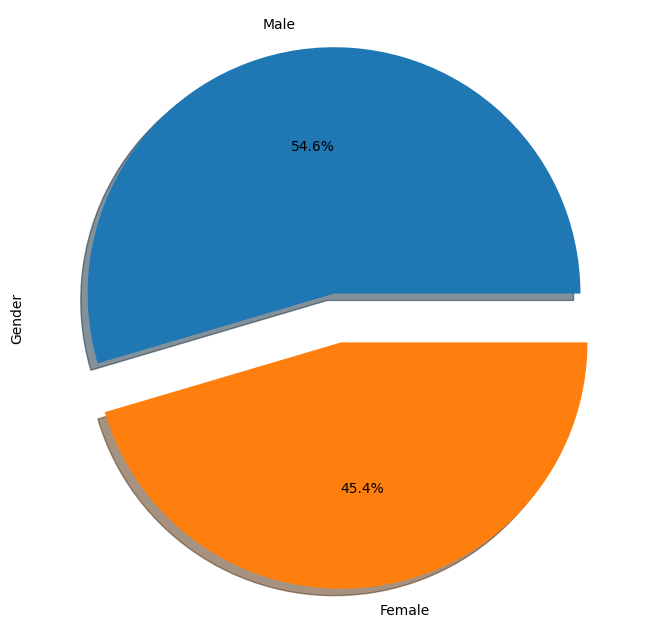

In [9]:
dataset['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [10]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

In [11]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (9500, 13)
Unseen Data For Predictions (500, 13)


In [12]:
data['Gender'].value_counts()

Male      5182
Female    4318
Name: Gender, dtype: int64

In [15]:
import sys
!{sys.executable} -m pip install numpy


ModuleNotFoundError: No module named 'pycaret'

In [14]:
# Imporing pycaret classification method
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [16]:
# This is the first step of model selection
# Here the data is our dataset, target is the labeled column(dependent variable), section is is random number for future identification.
exp = setup(data = data, target = 'Gender', session_id=77 )

# After this we will get a list of our columns and its type, just confirm they are the same. Then hit enter.

NameError: name 'setup' is not defined

In [ ]:
#This comand is used to compare different models with our dataset.
#The acuuracy,F1 etc of each model is listed in a table.
#Choose which model you want
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Naive Bayes,1,0,1,1,1,1
1,Decision Tree Classifier,1,0,1,1,1,1
2,Quadratic Discriminant Analysis,1,0,1,1,1,1
3,Gradient Boosting Classifier,1,0,1,1,1,1
4,Extra Trees Classifier,1,0,1,1,1,1
5,Light Gradient Boosting Machine,1,0,1,1,1,1
6,CatBoost Classifier,1,0,1,1,1,1
7,Random Forest Classifier,0.99,0,0.9889,0.9925,0.9897,0.9848
8,Ada Boost Classifier,0.99,0,0.9889,0.992,0.9896,0.9846
9,Extreme Gradient Boosting,0.98,0,0.9806,0.9845,0.9796,0.9697


In [ ]:
# With this command we are creating a Naives Byes model
# The code for Naives Byes is " nb "
# fold is the number of fold you want

nb_model = create_model('nb', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0
5,1.0,0.0,1.0,1.0,1.0,1.0
6,1.0,0.0,1.0,1.0,1.0,1.0
7,1.0,0.0,1.0,1.0,1.0,1.0
8,1.0,0.0,1.0,1.0,1.0,1.0
9,1.0,0.0,1.0,1.0,1.0,1.0


In [ ]:

nb_tuned = tune_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0
5,1.0,0.0,1.0,1.0,1.0,1.0
6,1.0,0.0,1.0,1.0,1.0,1.0
7,1.0,0.0,1.0,1.0,1.0,1.0
8,1.0,0.0,1.0,1.0,1.0,1.0
9,1.0,0.0,1.0,1.0,1.0,1.0


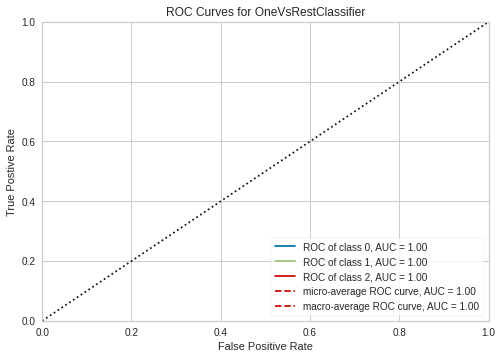

In [ ]:
plot_model(nb_tuned, plot = 'auc')

In [ ]:
predict_model(nb_tuned);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,1.0,0,1.0,1.0,1.0,1.0


In [ ]:
new_prediction = predict_model(nb_tuned, data=data_unseen)

In [ ]:
new_prediction

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label,Score
0,143,5.8,2.7,5.1,1.9,Iris-virginica,2,1.0
1,144,6.8,3.2,5.9,2.3,Iris-virginica,2,1.0
2,145,6.7,3.3,5.7,2.5,Iris-virginica,2,1.0
3,146,6.7,3.0,5.2,2.3,Iris-virginica,2,1.0
4,147,6.3,2.5,5.0,1.9,Iris-virginica,2,1.0
5,148,6.5,3.0,5.2,2.0,Iris-virginica,2,1.0
6,149,6.2,3.4,5.4,2.3,Iris-virginica,2,1.0
7,150,5.9,3.0,5.1,1.8,Iris-virginica,2,1.0
